<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Integration**
**Teo Nordström**

# **Abstract**

This file contains the solutions to the three mandatory problems from Lab4 in DD2363, in addition to the solution to one of the optional problems. It is based upon pseudocode and info found in *Methods in Computational Science* by Johan Hoffman (2021)

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license.

In [2]:
"""This file is based on a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# TEMPLATE INFO:
# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# CODE INFO:
# Code written by Teo Nordström 2024, no license.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

These are the neccessary modules for everything in this file to work.

In [3]:
from google.colab import files

import numpy as np

from matplotlib import pyplot as plt


# **Introduction**

All solutions will be partially or entirely based upon the book *Methods in Computational Science* by Johan Hoffman (2021). In the text, it will be referred to as the "course book".

# 2-Point Gauss Quadrature Over Unit Interval
Gauss Quadrature is a method for numerical integration that can be used to approximate or solve integrations of functions. The gauss quadrature in specific uses Gauss points from the Legendre polynomials which enables it to used $q$ points to exactly solve any integrals with degree of up to $2q - 1$. It works on an interval $[-1, 1]$ meaning we have to change the interval to get results for a unit interval ($[0, 1]$). For a specifically 2-point Gauss Quadrature we can exactly solve up to cubic integrals, and for this we have to use the Gauss points $\frac{1}{\sqrt{3}}$ and $-\frac{1}{\sqrt{3}}$ together with the weights $w_0 = w_1 = 1$.

# 3-Point Edge Midpoint Quadrature Over a Reference Triangle
The 3-point edge midpoint quadrature is a method of using the Gauss rule to find integrals in 2D triangles, specifically in this case on the reference triangle. We can see from example 11.5 and figure 11.3 in the course book how this is supposed to be set up, with the quadrature points as the midpoints of the lines ($(\frac{1}{2}, 0), (0, \frac{1}{2}), (\frac{1}{2}, \frac{1}{2})$ for the reference triangle) and weights for each being $\frac{1}{6}$.


# Monte Carlo Quadrature Over a Unit Interval


# Least-Squares Problem (bonus)




# **Method**

# 2-Point Gauss Quadrature Over Unit Interval
In what is probably the shortest solution to any problem in this course, we have the 2-Point Gauss Quadrature over the Unit Interval. Coming in at a whopping two lines, this implementation uses a coordinate mapping $F:[-1, 1]\rightarrow [0, 1]$ where $F(x) = \frac{1 + x}{2}$. We translate the limits, gauss points and weights using this mapping, and multiply the results by the Jacobian $\frac{1}{2}$ :to get the final function.

In [4]:
def gauss_quadrature(f):
    return f((1 + 1 / 3**(1/2)) / 2) / 2 + f((1 - 1 / 3**(1/2)) / 2) / 2


def gs_f(x):
    return x**3 + x**2 + x


print(gauss_quadrature(gs_f))

1.0833333333333333


#3-Point Edge Midpoint Quadrature Over a Reference Triangle
In a twist of fate this implementation was EVEN SHORTER. With midpoints at easy points for a reference triangle, we only have to add the function value of the three points together and multiply them with their weights, but since all three have the same weight $\frac{1}{6}$ we can just divide the sum by $6$ to get the integral over the reference triangle.

In [5]:
def edge_midpoint_quadrature(f):
    return (f(0, 0.5) + f(0.5, 0) + f(0.5, 0.5)) / 6


def em_f(x, y):
    return x**2 + y**2 + x*y + x + y + 1


print(edge_midpoint_quadrature(em_f))

1.0416666666666667


# Monte Carlo Quadrature Over a Unit Interval

Monte Carlo Quadrature is a probabilistic way of figuring out the integral of a function. To find the integral over a unit interval you essentially just test a bunch of places from within the range and then divide the sum of all of these values by the amount of probed places. This is done on the form $\int_a^b f(x)dx ≈ \frac{1}{n} \sum_{i=1}^n f(x_i)|D|$ where $|D| = |b - a|$ which in our case means $|D| = 1$.

In [6]:
def monte_carlo_quadrature(f, points=256):
    func_sum = 0
    for i in range(points):
        x = np.random.uniform(0, 1)
        func_sum += f(x)
    return func_sum / points


def mc_f(x):
    return x**3 + x**2 + x + 1


print(monte_carlo_quadrature(mc_f))

2.085314547567727


# Monte Carlo Quadrature Over a Reference Triangle (bonus)

Monte Carlo Quadrature Over a Reference Triangle is a variant of the same function over the unit interval, with the difference being that we now have to check the function in two dimensions. We have to make sure to check so that the chosen coordinates are inside of the triangle, if they are not we fold the square upon itself so all positions within the unit square have a position in the triangle, without changing the probability of any specific point to be chosen. Because of this however we have to divide each function value in half, since the unit square has an area double the size of the reference triangle.

In [7]:
def monte_carlo_quadrature_ref_triangle(f, points=256):
    func_sum = 0
    for i in range(points):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if x + y > 1:
            func_sum += f(1-y, 1-x) / 2
        else:
            func_sum += f(x, y) / 2
    return func_sum / points


def mcr_f(x, y):
    return x**2 + y**2 + x*y + x + y + 1


print(monte_carlo_quadrature_ref_triangle(mcr_f))

1.0617924271437087


# **Results**

In this section tests will be performed to verify that the solutions are correct

# 2-Point Gauss Quadrature Over Unit Interval
To test the 2-Point Gauss Quadrature we begin by creating a polynomial of degree 3 with 4 different constants $c_0, c_1, c_2, c_3 ∈ c$ on the form $c_0x^3 + c_1x^2 + c_2x + c_3$. The integral of this over the range $[0, 1]$ is $\frac{c_0}{4} + \frac{c_1}{3} + \frac{c_2}{2} + c_3$ which will be what we test againt to see that the answers correspond. As is visible, we mostly get exact zeroes, though occasionally we get a value that can be chalked down to a rounding error or float precision error.  


In [8]:
def gq_test(iters):
    for test in range(iters):
        c = [np.random.rand() * 20 - 10 for _ in range(4)]

        def f(x):
            return c[0] * x**3 + c[1] * x**2 + c[2] * x + c[3]

        integral = c[0] / 4 + c[1] / 3 + c[2] / 2 + c[3]

        diff = np.abs(gauss_quadrature(f) - integral)

        print(f"Test {test+1}, Difference = {diff}")


gq_test(5)

Test 1, Difference = 4.440892098500626e-16
Test 2, Difference = 8.881784197001252e-16
Test 3, Difference = 2.220446049250313e-16
Test 4, Difference = 0.0
Test 5, Difference = 0.0



# 3-point Edge Midpoint Quadrature Over a Reference Triangle
To test this function we do essentially the same thing as in the previous section, but with 6 constants $c_0, c_1, c_2, c_3, c_4, c_5 ∈ c$ on the form $c_0x^2 + c_1y^2 + c_2xy + c_3x + c_4y + c_5$. This can be integrated to get that the integral for this over the reference triangle would be $\frac{c_0}{12} + \frac{c_1}{12} + \frac{c_2}{24} + \frac{c_3}{6} + \frac{c_4}{6} + \frac{c_5}{2}$. We compare this to the result from the function and see that it is equal, outside of occasional rounding or float precision errors.

In [10]:
def em_test(iters):
    for test in range(iters):
        c = [np.random.rand() * 20 - 10 for _ in range(6)]

        def f(x, y):
            return c[0] * x**2 + c[1] * y**2 + c[2] * x * y + c[3] * x + c[4] * y + c[5]

        integral = c[0] / 12 + c[1] / 12 + c[2] / 24 + c[3] / 6 + c[4] / 6 + c[5] / 2

        diff = np.abs(edge_midpoint_quadrature(f) - integral)

        print(f"Test {test+1}, Difference = {diff}")


em_test(5)

Test 1, Difference = 0.0
Test 2, Difference = 8.881784197001252e-16
Test 3, Difference = 4.440892098500626e-16
Test 4, Difference = 0.0
Test 5, Difference = 5.551115123125783e-17



# Monte Carlo Quadrature Over a Unit Interval

To test the Monte Carlo Quadrature implementation, we begin by generating a third degree polynomial together with its integral just as we did in the first problem. We then run the function and get the average difference of 10 times for each amount of sample points, from $1$ to $300$ points. We then place this together with the expected convergence rate $\frac{1}{\sqrt{n}}$ (where $n$ is the amount of points) to see if the function converges as expected. Looking at the results, we can clearly se that it does.

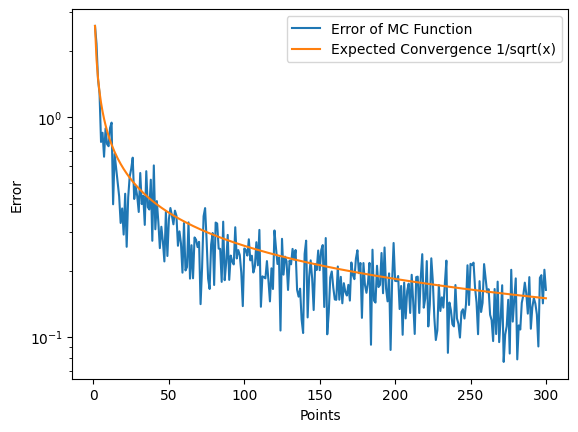

In [9]:
def mc_test(iters):
    c = [np.random.rand() * 20 - 10 for _ in range(4)]

    def f(x):
        return c[0] * x ** 3 + c[1] * x ** 2 + c[2] * x + c[3]

    integral = c[0] / 4 + c[1] / 3 + c[2] / 2 + c[3]
    n_pow = 1
    differences = []
    x_axis = []
    y_sqrt_axis = []
    for test in range(iters):
        x_axis.append(n_pow)
        diff = 0
        for i in range(10):
            diff += np.abs(monte_carlo_quadrature(f, n_pow) - integral)
        diff /= 10
        differences.append(diff)

        y_sqrt_axis.append(differences[0] / n_pow**(1/2))

        n_pow += 1

    plt.yscale("log")
    plt.plot(x_axis, differences, label="Error of MC Function")
    plt.plot(x_axis, y_sqrt_axis, label="Expected Convergence 1/sqrt(x)")
    plt.xlabel("Points")
    plt.ylabel("Error")
    plt.legend()
    plt.show()


mc_test(300)


# Monte Carlo Quadrature Over a Reference Triangle (bonus)

To test the implementation of Monte Carlo Quadrature over a reference triangle we do essentially the same thing as we did to test the one for the unit interval, but replacing the function with the one we got from the second problem (which also is a reference triangle problem). We can see here too that the convergence appears to strongly follow the expected value of $\frac{1}{\sqrt{n}}$.

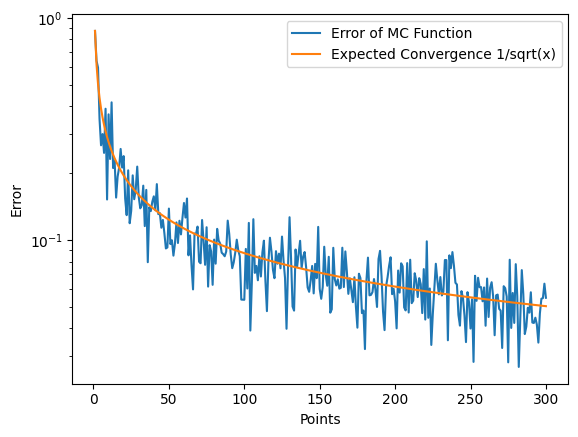

In [11]:
def mcr_test(iters):
    c = [np.random.rand() * 20 - 10 for _ in range(6)]

    def f(x, y):
        return c[0] * x ** 2 + c[1] * y ** 2 + c[2] * x * y + c[3] * x + c[4] * y + c[5]

    integral = c[0] / 12 + c[1] / 12 + c[2] / 24 + c[3] / 6 + c[4] / 6 + c[5] / 2
    n_pow = 1
    differences = []
    x_axis = []
    y_sqrt_axis = []
    for test in range(iters):
        x_axis.append(n_pow)
        diff = 0
        for i in range(10):
            diff += np.abs(monte_carlo_quadrature_ref_triangle(f, n_pow) - integral)
        diff /= 10
        differences.append(diff)

        y_sqrt_axis.append(differences[0] / n_pow**(1/2))

        n_pow += 1

    plt.yscale("log")
    plt.plot(x_axis, differences, label="Error of MCR Function")
    plt.plot(x_axis, y_sqrt_axis, label="Expected Convergence 1/sqrt(x)")
    plt.xlabel("Points")
    plt.ylabel("Error")
    plt.legend()
    plt.show()


mcr_test(300)

# **Discussion**

The assignments for this week felt more manageable than they have the last few weeks which is a very nice thing, allows for more of a breather. The results are pretty much exactly how they would be expected to be, though the rounding errors are always annoying to deal with because to a point you cannot be entirely sure whether it is a computer problem or if its a problem with your implementation.